In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from datetime import datetime as dt 
import os 

In [2]:
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline 

In [4]:
sns.set_theme(context = 'paper' , style = 'darkgrid' , palette = 'afmhot' , font_scale = 1.1,
             rc = {'figure.figsize' : (5 , 5)})

In [5]:
df = pd.read_csv('India Census 2011.csv')
df.head()

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334


### Q. 1) How will you hide the indexes of the dataframe.

In [7]:
df.style.hide_index()

District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,56759,7946,37128,823286,1700,5600,66,39,74948,39709,21751,600759,178435,89679
2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,36630,29102,10110,736054,1489,5559,47,6,66459,41367,27950,503223,160933,88978
3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,1645,1020,22882,19057,658,1092,88635,103,16265,8923,6197,70703,41515,21019
4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,8266,3763,1222,10341,108239,604,1171,20126,28,16938,9826,3077,87532,35561,17488
5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,54264,31583,3930,32604,431279,958,11188,83,10,46062,29517,13962,304979,109818,61334
6,JAMMU AND KASHMIR,Rajouri,642415,345351,297064,364109,290912,184752,106160,136527,24016,4656,221880,402879,983,15513,189,26,65921,35804,18576,404903,153165,83319
7,JAMMU AND KASHMIR,Kathua,616435,326109,290326,389204,200431,161548,38883,69533,21566,3952,540063,64234,1828,9551,24,16,91522,47694,24330,357864,160123,97684
8,JAMMU AND KASHMIR,Baramula,1008039,534733,473306,545149,304200,249581,54619,57495,62246,15084,30621,959185,1497,14770,140,29,107837,57932,48285,636524,239659,130513
9,JAMMU AND KASHMIR,Bandipore,392232,207680,184552,185979,149317,101380,47937,28232,32882,20484,8439,382006,572,555,44,17,35630,18644,12721,252378,90465,48802
10,JAMMU AND KASHMIR,Srinagar,1236829,651124,585705,748584,407188,333151,74037,12228,10408,20095,42540,1177342,2746,12187,285,74,176409,132727,121856,693238,351561,190330


### Q. 2) How can we set the caption / heading on the dataframe.

In [10]:
df[ df['State_name'] == 'JAMMU AND KASHMIR'].style.set_caption('state name is JAMMU AND KASHMIR	')

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,56759,7946,37128,823286,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,36630,29102,10110,736054,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,1645,1020,22882,19057,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,8266,3763,1222,10341,108239,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,54264,31583,3930,32604,431279,958,11188,83,10,46062,29517,13962,304979,109818,61334
5,6,JAMMU AND KASHMIR,Rajouri,642415,345351,297064,364109,290912,184752,106160,136527,24016,4656,221880,402879,983,15513,189,26,65921,35804,18576,404903,153165,83319
6,7,JAMMU AND KASHMIR,Kathua,616435,326109,290326,389204,200431,161548,38883,69533,21566,3952,540063,64234,1828,9551,24,16,91522,47694,24330,357864,160123,97684
7,8,JAMMU AND KASHMIR,Baramula,1008039,534733,473306,545149,304200,249581,54619,57495,62246,15084,30621,959185,1497,14770,140,29,107837,57932,48285,636524,239659,130513
8,9,JAMMU AND KASHMIR,Bandipore,392232,207680,184552,185979,149317,101380,47937,28232,32882,20484,8439,382006,572,555,44,17,35630,18644,12721,252378,90465,48802
9,10,JAMMU AND KASHMIR,Srinagar,1236829,651124,585705,748584,407188,333151,74037,12228,10408,20095,42540,1177342,2746,12187,285,74,176409,132727,121856,693238,351561,190330


### Q. 3) Show the records related with the districts - New Delhi , Lucknow , Jaipur.

In [11]:
df[ df['District_name'].isin(['New Delhi' , 'Lucknow' , 'Jaipur'])]

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
93,94,NCT OF DELHI,New Delhi,142004,77942,64062,114179,59541,46940,12601,...,4852,2933,312,679,15942,17742,23934,76076,43913,21773
109,110,RAJASTHAN,Jaipur,6626178,3468507,3157671,4300965,2464893,1714947,749946,...,12708,18782,1020,81079,659389,455527,703673,4091148,1646480,884057
156,157,UTTAR PRADESH,Lucknow,4589838,2394476,2195362,3127260,1542806,1226399,316407,...,20493,23883,3877,4975,428121,378742,639260,2678289,1161686,685258


### Q. 4) Calculate state-wise :
* A. Total number of population.
* B. Total no. of the population with different religions.

In [13]:
df.groupby('State_name')['Population'].sum().to_frame()

,Population
State_name,
ANDAMAN AND NICOBAR ISLANDS,380581
ANDHRA PRADESH,84580777
ARUNACHAL PRADESH,1383727
ASSAM,31205576
BIHAR,104099452
CHANDIGARH,1055450
CHHATTISGARH,25545198
DADRA AND NAGAR HAVELI,343709
DAMAN AND DIU,243247


<AxesSubplot:xlabel='Population', ylabel='State_name'>

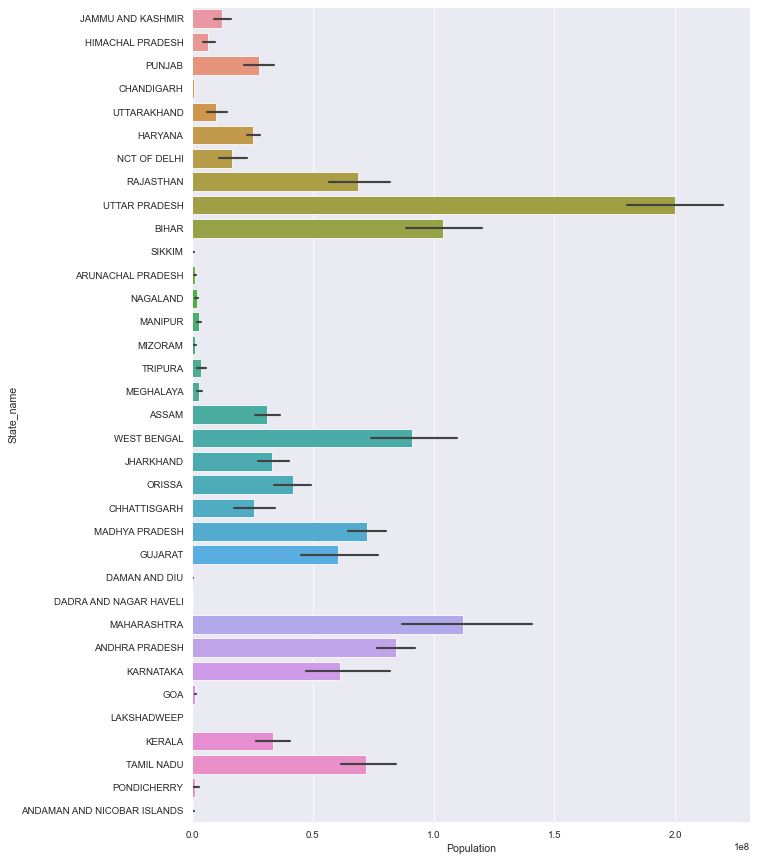

In [18]:
plt.figure(figsize = (10 , 15))
sns.barplot(data = df , y = 'State_name' , x = 'Population' , estimator = np.sum)

In [19]:
df.columns

Index(['District_code', 'State_name', 'District_name', 'Population', 'Male',
       'Female', 'Literate', 'Workers', 'Male_Workers', 'Female_Workers',
       'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50'],
      dtype='object')

In [36]:
def GetPopulationOfRelgion(data , x , y):
    plt.figure(figsize = (10 , 15))
    plt.title(f'Population of {y} in each state'.title() , 
              fontdict = {'fontsize' : 20 , 'color' : 'b' , 'fontweight' : 'bold'})
    sns.barplot(data = df , y = x , x = y , estimator = np.sum)
    return df.groupby(x)[y].sum().to_frame().style.set_caption(f'Population of {y} in each state'.title())

,Muslims
State_name,
ANDAMAN AND NICOBAR ISLANDS,32413
ANDHRA PRADESH,8082412
ARUNACHAL PRADESH,27045
ASSAM,10679345
BIHAR,17557809
CHANDIGARH,51447
CHHATTISGARH,514998
DADRA AND NAGAR HAVELI,12922
DAMAN AND DIU,19277


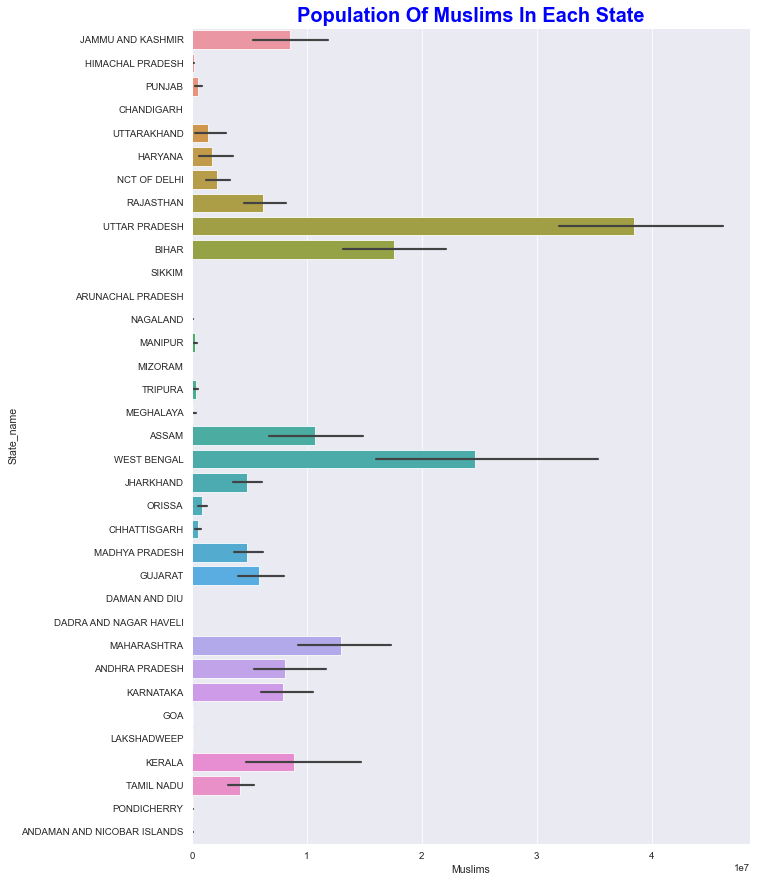

In [37]:
GetPopulationOfRelgion(df , x = 'State_name' , y = 'Muslims')

,Christians
State_name,
ANDAMAN AND NICOBAR ISLANDS,80984
ANDHRA PRADESH,1129784
ARUNACHAL PRADESH,418732
ASSAM,1165867
BIHAR,129247
CHANDIGARH,8720
CHHATTISGARH,490542
DADRA AND NAGAR HAVELI,5113
DAMAN AND DIU,2820


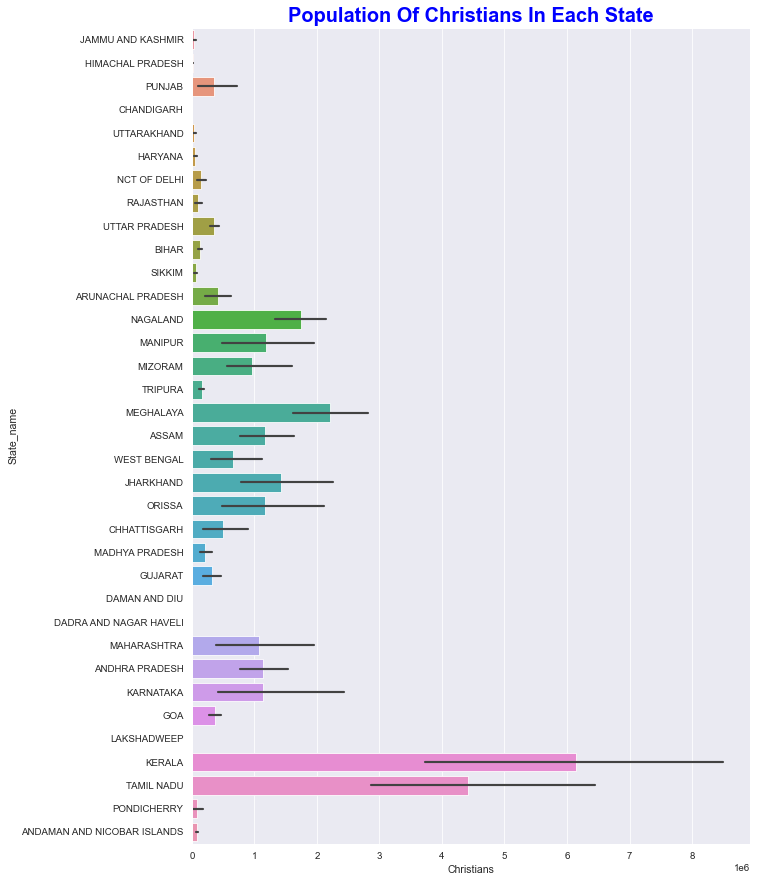

In [38]:
GetPopulationOfRelgion(df , x = 'State_name' , y = 'Christians')

,Sikhs
State_name,
ANDAMAN AND NICOBAR ISLANDS,1286
ANDHRA PRADESH,40244
ARUNACHAL PRADESH,3287
ASSAM,20672
BIHAR,23779
CHANDIGARH,138329
CHHATTISGARH,70036
DADRA AND NAGAR HAVELI,217
DAMAN AND DIU,172


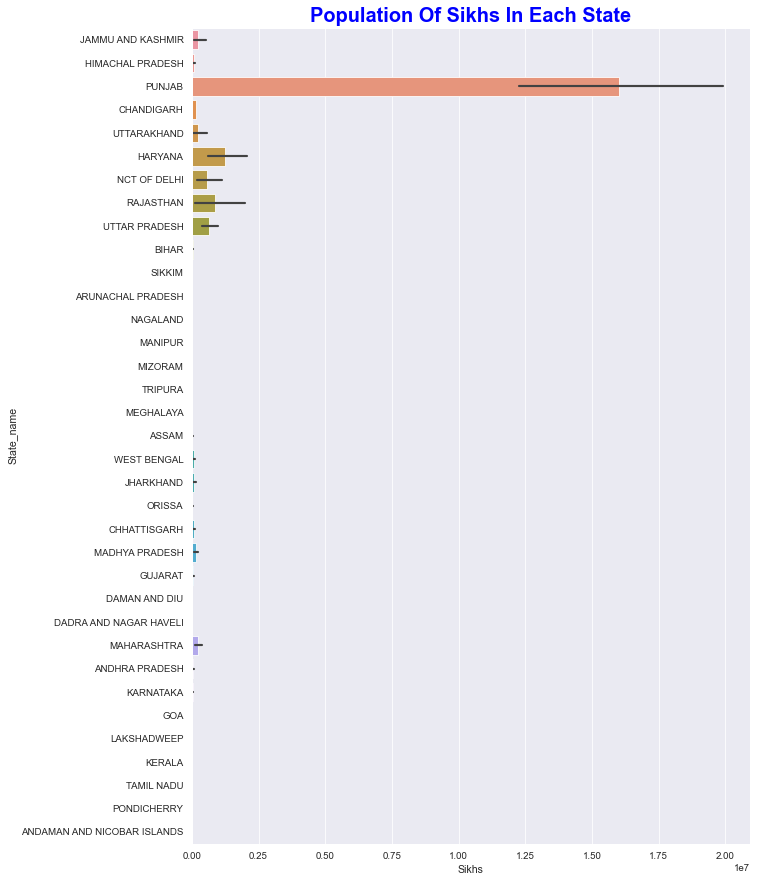

In [39]:
GetPopulationOfRelgion(df , x = 'State_name' , y = 'Sikhs')

,Buddhists
State_name,
ANDAMAN AND NICOBAR ISLANDS,338
ANDHRA PRADESH,36692
ARUNACHAL PRADESH,162815
ASSAM,54993
BIHAR,25453
CHANDIGARH,1160
CHHATTISGARH,70467
DADRA AND NAGAR HAVELI,634
DAMAN AND DIU,217


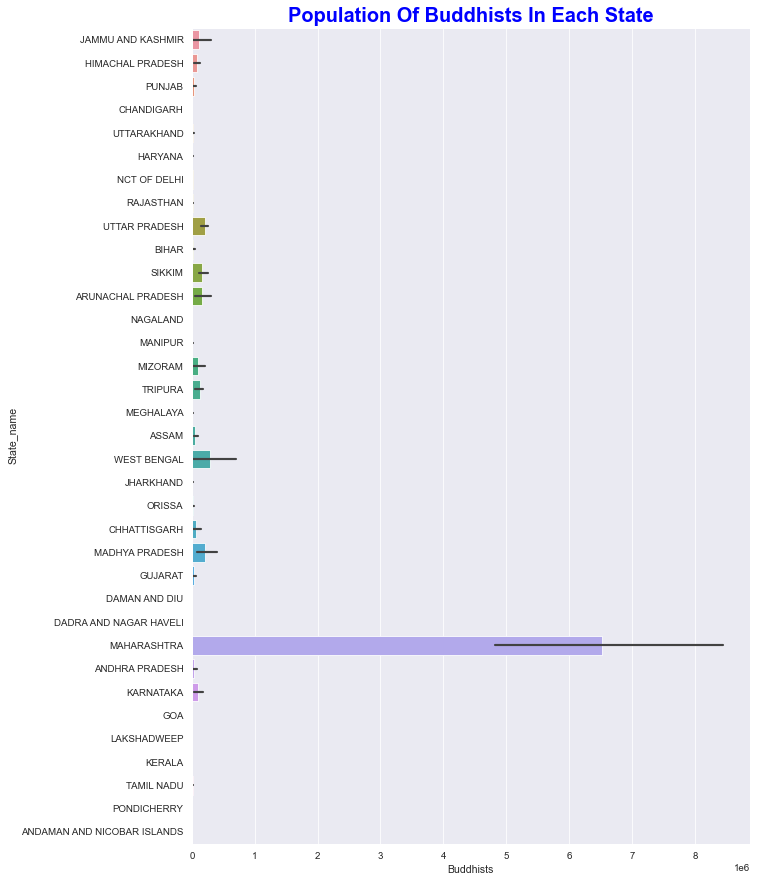

In [40]:
GetPopulationOfRelgion(df , x = 'State_name' , y = 'Buddhists')

,Jains
State_name,
ANDAMAN AND NICOBAR ISLANDS,31
ANDHRA PRADESH,53849
ARUNACHAL PRADESH,771
ASSAM,25949
BIHAR,18914
CHANDIGARH,1960
CHHATTISGARH,61510
DADRA AND NAGAR HAVELI,1186
DAMAN AND DIU,287


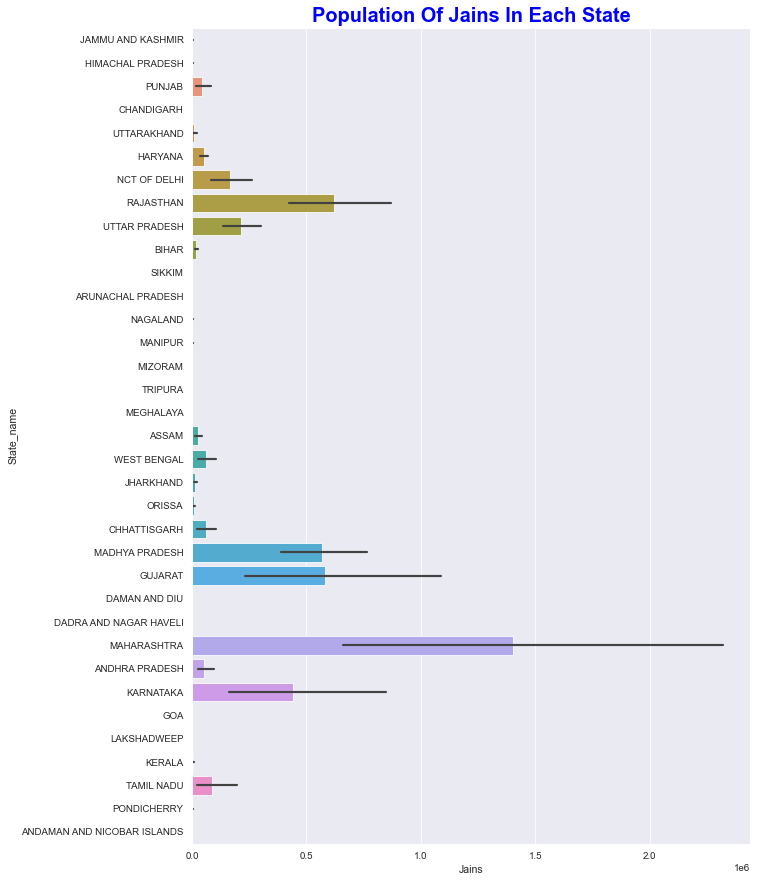

In [41]:
GetPopulationOfRelgion(df , x = 'State_name' , y = 'Jains')

,Hindus
State_name,
ANDAMAN AND NICOBAR ISLANDS,264296
ANDHRA PRADESH,74824149
ARUNACHAL PRADESH,401876
ASSAM,19180759
BIHAR,86078686
CHANDIGARH,852574
CHHATTISGARH,23819789
DADRA AND NAGAR HAVELI,322857
DAMAN AND DIU,220150


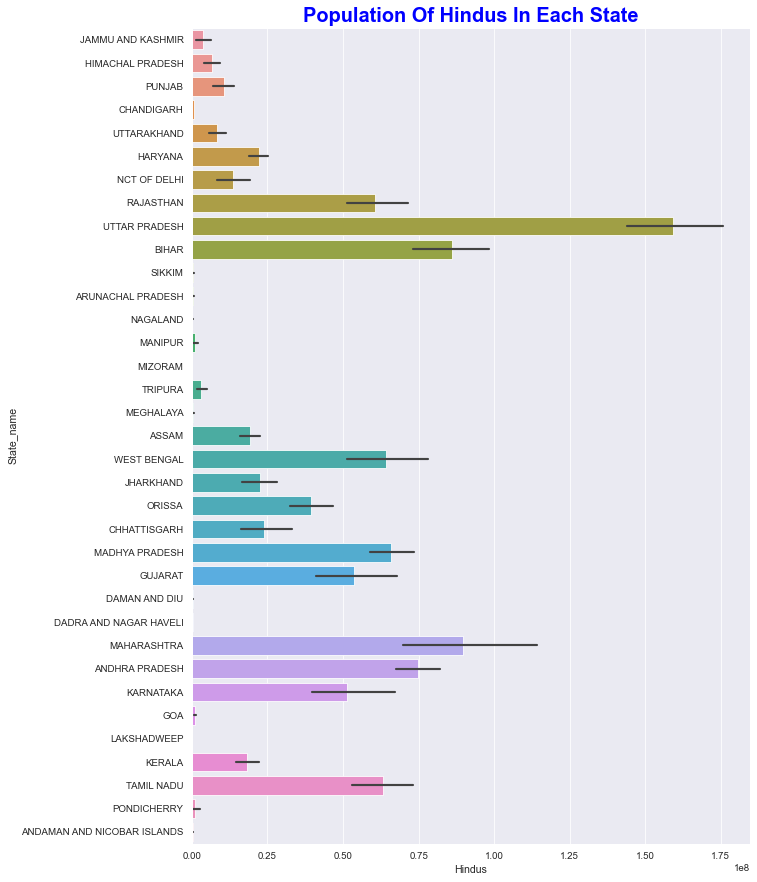

In [42]:
GetPopulationOfRelgion(df , x = 'State_name' , y = 'Hindus')

### Q. 5) How many Male Workers were there in Maharashtra state ?

In [48]:
df[ df['State_name'] == 'MAHARASHTRA']['Male_Workers'].sum()

32616875

### Q. 6) How to set a column as index of the dataframe ?

In [49]:
df.set_index(df['District_code'])

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
District_code,,,,,,,,,,,,,,,,,,,,,
1,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
2,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
3,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
4,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
5,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,636,PONDICHERRY,Mahe,41816,19143,22673,36470,11802,9093,2709,...,958,3,21,14,8773,5711,4475,19760,12543,9428
637,637,PONDICHERRY,Karaikal,200222,97809,102413,154916,68301,53139,15162,...,18391,46,63,54,29456,15930,18998,102333,60089,37434
638,638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842,20727,16115,25332,17125,12714,4411,...,26077,343,119,0,6325,3668,1300,18786,12088,5922


### Q. 7a) Add a Suffix to the column names.


In [55]:
df['State_name'].add_prefix('HI')

HI0                JAMMU AND KASHMIR
HI1                JAMMU AND KASHMIR
HI2                JAMMU AND KASHMIR
HI3                JAMMU AND KASHMIR
HI4                JAMMU AND KASHMIR
                    ...             
HI635                    PONDICHERRY
HI636                    PONDICHERRY
HI637    ANDAMAN AND NICOBAR ISLANDS
HI638    ANDAMAN AND NICOBAR ISLANDS
HI639    ANDAMAN AND NICOBAR ISLANDS
Name: State_name, Length: 640, dtype: object

### Q. 7b) Add a Prefix to the column names.

In [56]:
df['State_name'].add_suffix('HI')

0HI                JAMMU AND KASHMIR
1HI                JAMMU AND KASHMIR
2HI                JAMMU AND KASHMIR
3HI                JAMMU AND KASHMIR
4HI                JAMMU AND KASHMIR
                    ...             
635HI                    PONDICHERRY
636HI                    PONDICHERRY
637HI    ANDAMAN AND NICOBAR ISLANDS
638HI    ANDAMAN AND NICOBAR ISLANDS
639HI    ANDAMAN AND NICOBAR ISLANDS
Name: State_name, Length: 640, dtype: object